In [434]:
import pandas as pd
import pylab as pl
import geopandas as gpd
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/gerova/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['roll', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [100]:
est=pd.read_csv('cat_estacion.csv',encoding='latin-1')

In [101]:
base = gpd.read_file('cuadrantes2015.geojson')

In [102]:
df2017 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2017.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [103]:
df2016 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2016.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [104]:
df2015 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2015.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [105]:
df2014 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2014.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [106]:
df2013 = pd.read_csv('http://148.243.232.112:8080/opendata/anuales_horarios/contaminantes_2013.csv',
                   index_col=None,engine='python', skiprows=range(0,10))

In [107]:
yeardf=[df2013,df2014,df2015,df2016,df2017]

In [108]:
latmax=19.465
latmin=19.36
longmax=-99.1
longmin=-99.2

In [109]:
pollutants=['CO','PM10','PM2.5','NOX']

In [110]:
est=est[(est.latitud<=latmax)&(est.latitud>=latmin)&(est.longitud>longmin)&(est.longitud<longmax)]
est=est.reset_index()
est=est.drop('index',axis=1)

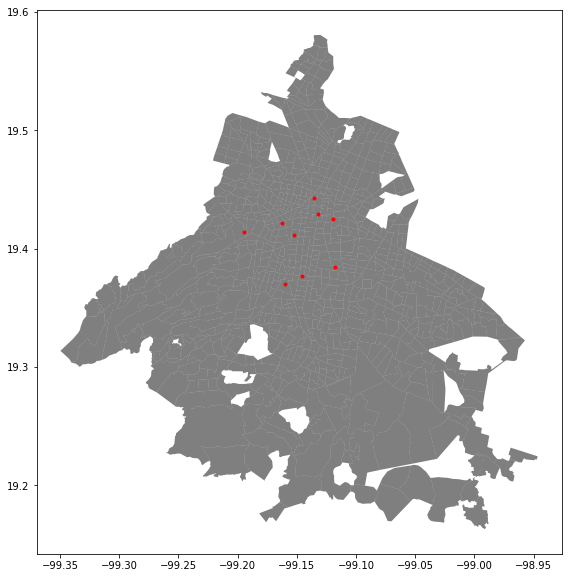

In [111]:
figsize(10,10)
base.geometry.plot(color='k',alpha=0.5)
pl.plot(est.longitud,est.latitud,'.',color='r')

In [112]:
stations=est.cve_estac.unique()

In [119]:
df=pd.DataFrame()
for y in range(0,len(yeardf)):   
    for i in range(0,len(stations)):
        df=df.append(yeardf[y][yeardf[y].id_station==stations[i]])

BJU
CFE
HGM
IZT
LAG
MCM
MER
MIN
POT
BJU
CFE
HGM
IZT
LAG
MCM
MER
MIN
POT
BJU
CFE
HGM
IZT
LAG
MCM
MER
MIN
POT
BJU
CFE
HGM
IZT
LAG
MCM
MER
MIN
POT
BJU
CFE
HGM
IZT
LAG
MCM
MER
MIN
POT


In [116]:
finaldf=pd.DataFrame()
for i in range(0,4):
    finaldf=finaldf.append(df[df.id_parameter==pollutants[i]])

In [136]:
stations=finaldf.id_station.unique()

In [ ]:
finaldf=finaldf.reset_index()
finaldf=finaldf.drop(['index'],axis=1)

In [7]:
for i in range(0,len(finaldf)):
    if finaldf['date'][i][-5:]=='24:00':
        finaldf['date'][i]=finaldf['date'][i].replace('24:00','00:00')

/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


23
47
71
95
119
143
167
191
215
239
263
287
311
335
359
383
407
431
455
479
503
527
551
575
599
623
647
671
695
719
743
767
791
815
839
863
887
911
935
959
983
1007
1031
1055
1079
1103
1127
1151
1175
1199
1223
1247
1271
1295
1319
1343
1367
1391
1415
1439
1463
1487
1511
1535
1559
1583
1607
1631
1655
1679
1703
1727
1751
1775
1799
1823
1847
1871
1895
1919
1943
1967
1991
2015
2039
2063
2087
2111
2135
2159
2183
2207
2231
2255
2279
2303
2327
2351
2375
2399
2423
2447
2471
2495
2519
2543
2567
2591
2615
2639
2663
2687
2711
2735
2759
2783
2807
2831
2855
2879
2903
2927
2951
2975
2999
3023
3047
3071
3095
3119
3143
3167
3191
3215
3239
3263
3287
3311
3335
3359
3383
3407
3431
3455
3479
3503
3527
3551
3575
3599
3623
3647
3671
3695
3719
3743
3767
3791
3815
3839
3863
3887
3911
3935
3959
3983
4007
4031
4055
4079
4103
4127
4151
4175
4199
4223
4247
4271
4295
4319
4343
4367
4391
4415
4439
4463
4487
4511
4535
4559
4583
4607
4631
4655
4679
4703
4727
4751
4775
4799
4823
4847
4871
4895
4919
4943
4967
4991
5015


34727
34751
34775
34799
34823
34847
34871
34895
34919
34943
34967
34991
35015
35039
35063
35087
35111
35135
35159
35183
35207
35231
35255
35279
35303
35327
35351
35375
35399
35423
35447
35471
35495
35519
35543
35567
35591
35615
35639
35663
35687
35711
35735
35759
35783
35807
35831
35855
35879
35903
35927
35951
35975
35999
36023
36047
36071
36095
36119
36143
36167
36191
36215
36239
36263
36287
36311
36335
36359
36383
36407
36431
36455
36479
36503
36527
36551
36575
36599
36623
36647
36671
36695
36719
36743
36767
36791
36815
36839
36863
36887
36911
36935
36959
36983
37007
37031
37055
37079
37103
37127
37151
37175
37199
37223
37247
37271
37295
37319
37343
37367
37391
37415
37439
37463
37487
37511
37535
37559
37583
37607
37631
37655
37679
37703
37727
37751
37775
37799
37823
37847
37871
37895
37919
37943
37967
37991
38015
38039
38063
38087
38111
38135
38159
38183
38207
38231
38255
38279
38303
38327
38351
38375
38399
38423
38447
38471
38495
38519
38543
38567
38591
38615
38639
38663
38687
3871

67511
67535
67559
67583
67607
67631
67655
67679
67703
67727
67751
67775
67799
67823
67847
67871
67895
67919
67943
67967
67991
68015
68039
68063
68087
68111
68135
68159
68183
68207
68231
68255
68279
68303
68327
68351
68375
68399
68423
68447
68471
68495
68519
68543
68567
68591
68615
68639
68663
68687
68711
68735
68759
68783
68807
68831
68855
68879
68903
68927
68951
68975
68999
69023
69047
69071
69095
69119
69143
69167
69191
69215
69239
69263
69287
69311
69335
69359
69383
69407
69431
69455
69479
69503
69527
69551
69575
69599
69623
69647
69671
69695
69719
69743
69767
69791
69815
69839
69863
69887
69911
69935
69959
69983
70007
70031
70055
70079
70103
70127
70151
70175
70199
70223
70247
70271
70295
70319
70343
70367
70391
70415
70439
70463
70487
70511
70535
70559
70583
70607
70631
70655
70679
70703
70727
70751
70775
70799
70823
70847
70871
70895
70919
70943
70967
70991
71015
71039
71063
71087
71111
71135
71159
71183
71207
71231
71255
71279
71303
71327
71351
71375
71399
71423
71447
71471
7149

100319
100343
100367
100391
100415
100439
100463
100487
100511
100535
100559
100583
100607
100631
100655
100679
100703
100727
100751
100775
100799
100823
100847
100871
100895
100919
100943
100967
100991
101015
101039
101063
101087
101111
101135
101159
101183
101207
101231
101255
101279
101303
101327
101351
101375
101399
101423
101447
101471
101495
101519
101543
101567
101591
101615
101639
101663
101687
101711
101735
101759
101783
101807
101831
101855
101879
101903
101927
101951
101975
101999
102023
102047
102071
102095
102119
102143
102167
102191
102215
102239
102263
102287
102311
102335
102359
102383
102407
102431
102455
102479
102503
102527
102551
102575
102599
102623
102647
102671
102695
102719
102743
102767
102791
102815
102839
102863
102887
102911
102935
102959
102983
103007
103031
103055
103079
103103
103127
103151
103175
103199
103223
103247
103271
103295
103319
103343
103367
103391
103415
103439
103463
103487
103511
103535
103559
103583
103607
103631
103655
103679
103703
103727

128519
128543
128567
128591
128615
128639
128663
128687
128711
128735
128759
128783
128807
128831
128855
128879
128903
128927
128951
128975
128999
129023
129047
129071
129095
129119
129143
129167
129191
129215
129239
129263
129287
129311
129335
129359
129383
129407
129431
129455
129479
129503
129527
129551
129575
129599
129623
129647
129671
129695
129719
129743
129767
129791
129815
129839
129863
129887
129911
129935
129959
129983
130007
130031
130055
130079
130103
130127
130151
130175
130199
130223
130247
130271
130295
130319
130343
130367
130391
130415
130439
130463
130487
130511
130535
130559
130583
130607
130631
130655
130679
130703
130727
130751
130775
130799
130823
130847
130871
130895
130919
130943
130967
130991
131015
131039
131063
131087
131111
131135
131159
131183
131207
131231
131255
131279
131303
131327
131351
131375
131399
131423
131447
131471
131495
131519
131543
131567
131591
131615
131639
131663
131687
131711
131735
131759
131783
131807
131831
131855
131879
131903
131927

156695
156719
156743
156767
156791
156815
156839
156863
156887
156911
156935
156959
156983
157007
157031
157055
157079
157103
157127
157151
157175
157199
157223
157247
157271
157295
157319
157343
157367
157391
157415
157439
157463
157487
157511
157535
157559
157583
157607
157631
157655
157679
157703
157727
157751
157775
157799
157823
157847
157871
157895
157919
157943
157967
157991
158015
158039
158063
158087
158111
158135
158159
158183
158207
158231
158255
158279
158303
158327
158351
158375
158399
158423
158447
158471
158495
158519
158543
158567
158591
158615
158639
158663
158687
158711
158735
158759
158783
158807
158831
158855
158879
158903
158927
158951
158975
158999
159023
159047
159071
159095
159119
159143
159167
159191
159215
159239
159263
159287
159311
159335
159359
159383
159407
159431
159455
159479
159503
159527
159551
159575
159599
159623
159647
159671
159695
159719
159743
159767
159791
159815
159839
159863
159887
159911
159935
159959
159983
160007
160031
160055
160079
160103

184799
184823
184847
184871
184895
184919
184943
184967
184991
185015
185039
185063
185087
185111
185135
185159
185183
185207
185231
185255
185279
185303
185327
185351
185375
185399
185423
185447
185471
185495
185519
185543
185567
185591
185615
185639
185663
185687
185711
185735
185759
185783
185807
185831
185855
185879
185903
185927
185951
185975
185999
186023
186047
186071
186095
186119
186143
186167
186191
186215
186239
186263
186287
186311
186335
186359
186383
186407
186431
186455
186479
186503
186527
186551
186575
186599
186623
186647
186671
186695
186719
186743
186767
186791
186815
186839
186863
186887
186911
186935
186959
186983
187007
187031
187055
187079
187103
187127
187151
187175
187199
187223
187247
187271
187295
187319
187343
187367
187391
187415
187439
187463
187487
187511
187535
187559
187583
187607
187631
187655
187679
187703
187727
187751
187775
187799
187823
187847
187871
187895
187919
187943
187967
187991
188015
188039
188063
188087
188111
188135
188159
188183
188207

212903
212927
212951
212975
212999
213023
213047
213071
213095
213119
213143
213167
213191
213215
213239
213263
213287
213311
213335
213359
213383
213407
213431
213455
213479
213503
213527
213551
213575
213599
213623
213647
213671
213695
213719
213743
213767
213791
213815
213839
213863
213887
213911
213935
213959
213983
214007
214031
214055
214079
214103
214127
214151
214175
214199
214223
214247
214271
214295
214319
214343
214367
214391
214415
214439
214463
214487
214511
214535
214559
214583
214607
214631
214655
214679
214703
214727
214751
214775
214799
214823
214847
214871
214895
214919
214943
214967
214991
215015
215039
215063
215087
215111
215135
215159
215183
215207
215231
215255
215279
215303
215327
215351
215375
215399
215423
215447
215471
215495
215519
215543
215567
215591
215615
215639
215663
215687
215711
215735
215759
215783
215807
215831
215855
215879
215903
215927
215951
215975
215999
216023
216047
216071
216095
216119
216143
216167
216191
216215
216239
216263
216287
216311

241079
241103
241127
241151
241175
241199
241223
241247
241271
241295
241319
241343
241367
241391
241415
241439
241463
241487
241511
241535
241559
241583
241607
241631
241655
241679
241703
241727
241751
241775
241799
241823
241847
241871
241895
241919
241943
241967
241991
242015
242039
242063
242087
242111
242135
242159
242183
242207
242231
242255
242279
242303
242327
242351
242375
242399
242423
242447
242471
242495
242519
242543
242567
242591
242615
242639
242663
242687
242711
242735
242759
242783
242807
242831
242855
242879
242903
242927
242951
242975
242999
243023
243047
243071
243095
243119
243143
243167
243191
243215
243239
243263
243287
243311
243335
243359
243383
243407
243431
243455
243479
243503
243527
243551
243575
243599
243623
243647
243671
243695
243719
243743
243767
243791
243815
243839
243863
243887
243911
243935
243959
243983
244007
244031
244055
244079
244103
244127
244151
244175
244199
244223
244247
244271
244295
244319
244343
244367
244391
244415
244439
244463
244487

269183
269207
269231
269255
269279
269303
269327
269351
269375
269399
269423
269447
269471
269495
269519
269543
269567
269591
269615
269639
269663
269687
269711
269735
269759
269783
269807
269831
269855
269879
269903
269927
269951
269975
269999
270023
270047
270071
270095
270119
270143
270167
270191
270215
270239
270263
270287
270311
270335
270359
270383
270407
270431
270455
270479
270503
270527
270551
270575
270599
270623
270647
270671
270695
270719
270743
270767
270791
270815
270839
270863
270887
270911
270935
270959
270983
271007
271031
271055
271079
271103
271127
271151
271175
271199
271223
271247
271271
271295
271319
271343
271367
271391
271415
271439
271463
271487
271511
271535
271559
271583
271607
271631
271655
271679
271703
271727
271751
271775
271799
271823
271847
271871
271895
271919
271943
271967
271991
272015
272039
272063
272087
272111
272135
272159
272183
272207
272231
272255
272279
272303
272327
272351
272375
272399
272423
272447
272471
272495
272519
272543
272567
272591

297311
297335
297359
297383
297407
297431
297455
297479
297503
297527
297551
297575
297599
297623
297647
297671
297695
297719
297743
297767
297791
297815
297839
297863
297887
297911
297935
297959
297983
298007
298031
298055
298079
298103
298127
298151
298175
298199
298223
298247
298271
298295
298319
298343
298367
298391
298415
298439
298463
298487
298511
298535
298559
298583
298607
298631
298655
298679
298703
298727
298751
298775
298799
298823
298847
298871
298895
298919
298943
298967
298991
299015
299039
299063
299087
299111
299135
299159
299183
299207
299231
299255
299279
299303
299327
299351
299375
299399
299423
299447
299471
299495
299519
299543
299567
299591
299615
299639
299663
299687
299711
299735
299759
299783
299807
299831
299855
299879
299903
299927
299951
299975
299999
300023
300047
300071
300095
300119
300143
300167
300191
300215
300239
300263
300287
300311
300335
300359
300383
300407
300431
300455
300479
300503
300527
300551
300575
300599
300623
300647
300671
300695
300719

325439
325463
325487
325511
325535
325559
325583
325607
325631
325655
325679
325703
325727
325751
325775
325799
325823
325847
325871
325895
325919
325943
325967
325991
326015
326039
326063
326087
326111
326135
326159
326183
326207
326231
326255
326279
326303
326327
326351
326375
326399
326423
326447
326471
326495
326519
326543
326567
326591
326615
326639
326663
326687
326711
326735
326759
326783
326807
326831
326855
326879
326903
326927
326951
326975
326999
327023
327047
327071
327095
327119
327143
327167
327191
327215
327239
327263
327287
327311
327335
327359
327383
327407
327431
327455
327479
327503
327527
327551
327575
327599
327623
327647
327671
327695
327719
327743
327767
327791
327815
327839
327863
327887
327911
327935
327959
327983
328007
328031
328055
328079
328103
328127
328151
328175
328199
328223
328247
328271
328295
328319
328343
328367
328391
328415
328439
328463
328487
328511
328535
328559
328583
328607
328631
328655
328679
328703
328727
328751
328775
328799
328823
328847

353567
353591
353615
353639
353663
353687
353711
353735
353759
353783
353807
353831
353855
353879
353903
353927
353951
353975
353999
354023
354047
354071
354095
354119
354143
354167
354191
354215
354239
354263
354287
354311
354335
354359
354383
354407
354431
354455
354479
354503
354527
354551
354575
354599
354623
354647
354671
354695
354719
354743
354767
354791
354815
354839
354863
354887
354911
354935
354959
354983
355007
355031
355055
355079
355103
355127
355151
355175
355199
355223
355247
355271
355295
355319
355343
355367
355391
355415
355439
355463
355487
355511
355535
355559
355583
355607
355631
355655
355679
355703
355727
355751
355775
355799
355823
355847
355871
355895
355919
355943
355967
355991
356015
356039
356063
356087
356111
356135
356159
356183
356207
356231
356255
356279
356303
356327
356351
356375
356399
356423
356447
356471
356495
356519
356543
356567
356591
356615
356639
356663
356687
356711
356735
356759
356783
356807
356831
356855
356879
356903
356927
356951
356975

381743
381767
381791
381815
381839
381863
381887
381911
381935
381959
381983
382007
382031
382055
382079
382103
382127
382151
382175
382199
382223
382247
382271
382295
382319
382343
382367
382391
382415
382439
382463
382487
382511
382535
382559
382583
382607
382631
382655
382679
382703
382727
382751
382775
382799
382823
382847
382871
382895
382919
382943
382967
382991
383015
383039
383063
383087
383111
383135
383159
383183
383207
383231
383255
383279
383303
383327
383351
383375
383399
383423
383447
383471
383495
383519
383543
383567
383591
383615
383639
383663
383687
383711
383735
383759
383783
383807
383831
383855
383879
383903
383927
383951
383975
383999
384023
384047
384071
384095
384119
384143
384167
384191
384215
384239
384263
384287
384311
384335
384359
384383
384407
384431
384455
384479
384503
384527
384551
384575
384599
384623
384647
384671
384695
384719
384743
384767
384791
384815
384839
384863
384887
384911
384935
384959
384983
385007
385031
385055
385079
385103
385127
385151

409871
409895
409919
409943
409967
409991
410015
410039
410063
410087
410111
410135
410159
410183
410207
410231
410255
410279
410303
410327
410351
410375
410399
410423
410447
410471
410495
410519
410543
410567
410591
410615
410639
410663
410687
410711
410735
410759
410783
410807
410831
410855
410879
410903
410927
410951
410975
410999
411023
411047
411071
411095
411119
411143
411167
411191
411215
411239
411263
411287
411311
411335
411359
411383
411407
411431
411455
411479
411503
411527
411551
411575
411599
411623
411647
411671
411695
411719
411743
411767
411791
411815
411839
411863
411887
411911
411935
411959
411983
412007
412031
412055
412079
412103
412127
412151
412175
412199
412223
412247
412271
412295
412319
412343
412367
412391
412415
412439
412463
412487
412511
412535
412559
412583
412607
412631
412655
412679
412703
412727
412751
412775
412799
412823
412847
412871
412895
412919
412943
412967
412991
413015
413039
413063
413087
413111
413135
413159
413183
413207
413231
413255
413279

437999
438023
438047
438071
438095
438119
438143
438167
438191
438215
438239
438263
438287
438311
438335
438359
438383
438407
438431
438455
438479
438503
438527
438551
438575
438599
438623
438647
438671
438695
438719
438743
438767
438791
438815
438839
438863
438887
438911
438935
438959
438983
439007
439031
439055
439079
439103
439127
439151
439175
439199
439223
439247
439271
439295
439319
439343
439367
439391
439415
439439
439463
439487
439511
439535
439559
439583
439607
439631
439655
439679
439703
439727
439751
439775
439799
439823
439847
439871
439895
439919
439943
439967
439991
440015
440039
440063
440087
440111
440135
440159
440183
440207
440231
440255
440279
440303
440327
440351
440375
440399
440423
440447
440471
440495
440519
440543
440567
440591
440615
440639
440663
440687
440711
440735
440759
440783
440807
440831
440855
440879
440903
440927
440951
440975
440999
441023
441047
441071
441095
441119
441143
441167
441191
441215
441239
441263
441287
441311
441335
441359
441383
441407

466151
466175
466199
466223
466247
466271
466295
466319
466343
466367
466391
466415
466439
466463
466487
466511
466535
466559
466583
466607
466631
466655
466679
466703
466727
466751
466775
466799
466823
466847
466871
466895
466919
466943
466967
466991
467015
467039
467063
467087
467111
467135
467159
467183
467207
467231
467255
467279
467303
467327
467351
467375
467399
467423
467447
467471
467495
467519
467543
467567
467591
467615
467639
467663
467687
467711
467735
467759
467783
467807
467831
467855
467879
467903
467927
467951
467975
467999
468023
468047
468071
468095
468119
468143
468167
468191
468215
468239
468263
468287
468311
468335
468359
468383
468407
468431
468455
468479
468503
468527
468551
468575
468599
468623
468647
468671
468695
468719
468743
468767
468791
468815
468839
468863
468887
468911
468935
468959
468983
469007
469031
469055
469079
469103
469127
469151
469175
469199
469223
469247
469271
469295
469319
469343
469367
469391
469415
469439
469463
469487
469511
469535
469559

494255
494279
494303
494327
494351
494375
494399
494423
494447
494471
494495
494519
494543
494567
494591
494615
494639
494663
494687
494711
494735
494759
494783
494807
494831
494855
494879
494903
494927
494951
494975
494999
495023
495047
495071
495095
495119
495143
495167
495191
495215
495239
495263
495287
495311
495335
495359
495383
495407
495431
495455
495479
495503
495527
495551
495575
495599
495623
495647
495671
495695
495719
495743
495767
495791
495815
495839
495863
495887
495911
495935
495959
495983
496007
496031
496055
496079
496103
496127
496151
496175
496199
496223
496247
496271
496295
496319
496343
496367
496391
496415
496439
496463
496487
496511
496535
496559
496583
496607
496631
496655
496679
496703
496727
496751
496775
496799
496823
496847
496871
496895
496919
496943
496967
496991
497015
497039
497063
497087
497111
497135
497159
497183
497207
497231
497255
497279
497303
497327
497351
497375
497399
497423
497447
497471
497495
497519
497543
497567
497591
497615
497639
497663

522407
522431
522455
522479
522503
522527
522551
522575
522599
522623
522647
522671
522695
522719
522743
522767
522791
522815
522839
522863
522887
522911
522935
522959
522983
523007
523031
523055
523079
523103
523127
523151
523175
523199
523223
523247
523271
523295
523319
523343
523367
523391
523415
523439
523463
523487
523511
523535
523559
523583
523607
523631
523655
523679
523703
523727
523751
523775
523799
523823
523847
523871
523895
523919
523943
523967
523991
524015
524039
524063
524087
524111
524135
524159
524183
524207
524231
524255
524279
524303
524327
524351
524375
524399
524423
524447
524471
524495
524519
524543
524567
524591
524615
524639
524663
524687
524711
524735
524759
524783
524807
524831
524855
524879
524903
524927
524951
524975
524999
525023
525047
525071
525095
525119
525143
525167
525191
525215


In [10]:
finaldf.to_csv('finaldf_clean.csv')

In [159]:
finaldf=pd.read_csv('finaldf_clean.csv')

In [165]:
finaldf=finaldf.drop(['Unnamed: 0.1'],axis=1)

In [395]:
stations

array(['HGM', 'IZT', 'MER', 'BJU'], dtype=object)

In [167]:
stationdf=[]
for i in range(0,len(stations)):
    stationdf.append(finaldf[finaldf.id_station==stations[i]])

In [42]:
COdf=finaldf[finaldf.id_parameter=='CO']
NOxdf=finaldf[finaldf.id_parameter=='NOX']
PM2df=finaldf[finaldf.id_parameter=='PM2.5']
PM10df=finaldf[finaldf.id_parameter=='PM10']

In [318]:
poldf=[]
for i in range(0,len(stationdf)):
    poldf.append(pd.pivot_table(stationdf[i],index='date',values='value',columns='id_parameter'))
    poldf[i]=poldf[i].reset_index()
    #poldf[i]['date']=pd.to_datetime(poldf[i]['date'],dayfirst=True)
    #poldf[i]=poldf[i].sort_values(by='date')
    #poldf[i]=poldf[i].dropna(axis=0)

In [305]:
pollutants

['CO', 'PM10', 'PM2.5', 'NOX']

In [319]:
print(len(poldf[0]),len(poldf[1]),len(poldf[2]),len(poldf[3]))

42360 42360 42360 19752


In [379]:
avpoll=np.zeros([len(poldf[0]),4])
for i in range(0,len(poldf[0])):
    co=[poldf[0].CO[i],poldf[1].CO[i],poldf[2].CO[i]]
    nox=[poldf[0].NOX[i],poldf[1].NOX[i],poldf[2].NOX[i]]
    pm10=[poldf[0]['PM2.5'][i],poldf[2]['PM2.5'][i]]
    pm=[poldf[0].PM10[i],poldf[1].PM10[i],poldf[2].PM10[i]]
    avpoll[i][0]=np.nanmean(co)
    avpoll[i][1]=np.nanmean(nox)
    avpoll[i][2]=np.nanmean(pm10)
    avpoll[i][3]=np.nanmean(pm)

/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [389]:
polldf=pd.DataFrame(avpoll,columns=['CO','NOx','PM10','PM2.5'])

In [390]:
polldf['date']=pd.to_datetime(poldf[0].date,dayfirst=True)

In [391]:
polldf=polldf.sort_values(by='date')

In [545]:
interval=12

In [546]:
COmean=pd.rolling_mean(polldf.CO,interval)
NOxmean=pd.rolling_mean(polldf.NOx,interval)
PM10mean=pd.rolling_mean(polldf.PM10,interval)
PMmean=pd.rolling_mean(polldf['PM2.5'],interval);

/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a fu

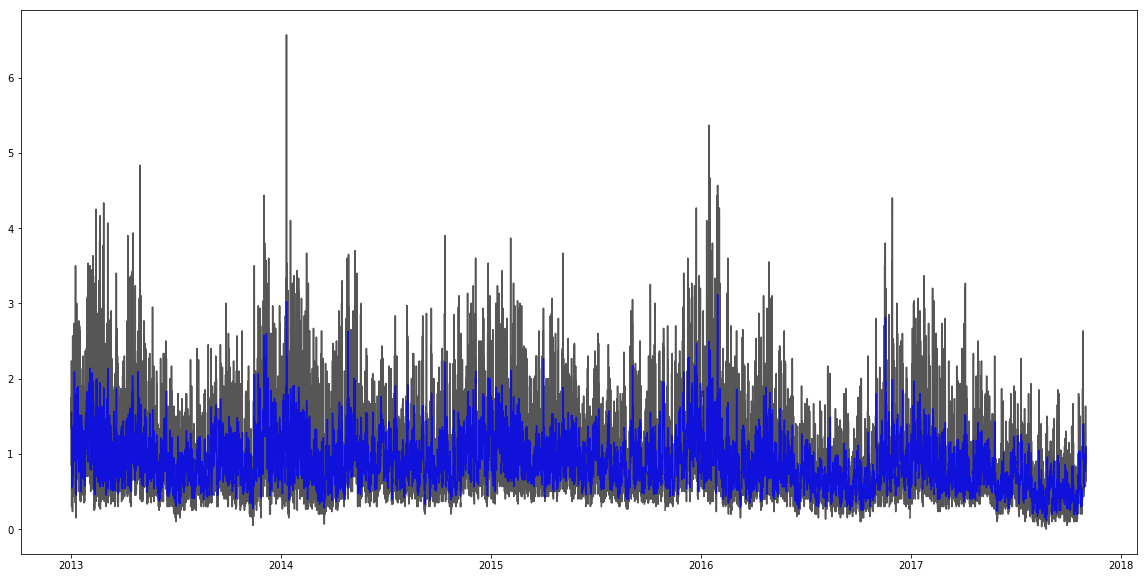

In [547]:
figsize(20,10)
for i in range(0,3):
    pl.plot(polldf.date,polldf['CO'],color='k',alpha=0.3)
pl.plot(polldf.date,COmean,'b',alpha=.8)
#pl.xlim('2015/12/15','2016/01/15');

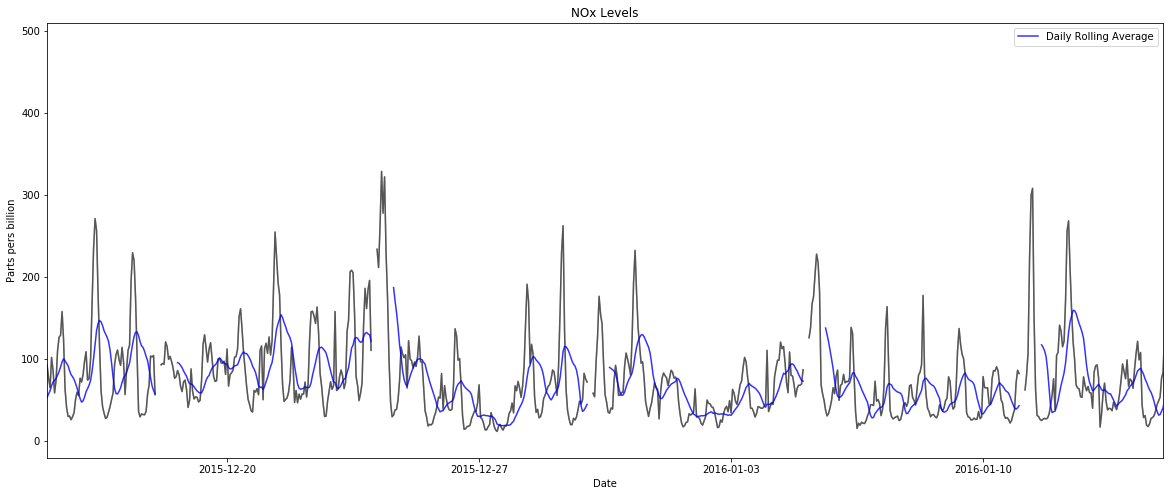

In [548]:
figsize(20,8)
for i in range(0,3):
    pl.plot(polldf.date,polldf['NOx'],color='k',alpha=0.3)
roll,=pl.plot(polldf.date,NOxmean,'b',alpha=.8,label='Daily Rolling Average')
pl.xlim('2015/12/15','2016/01/15')
pl.xlabel('Date')
pl.ylabel('Parts pers billion')
pl.title('NOx Levels')
pl.legend(handles=[roll]);

In [657]:
X=polldf.date
Y=PMmean

In [658]:
df=pd.DataFrame(pd.concat([X,Y],axis=1))

In [659]:
df['X']=X.apply(lambda x: (float((x-polldf.date[0]).total_seconds()/3600)))

In [660]:
df=df[((df.date.dt.month==2)&(df.date.dt.day==29))==False]

(0, 1000)

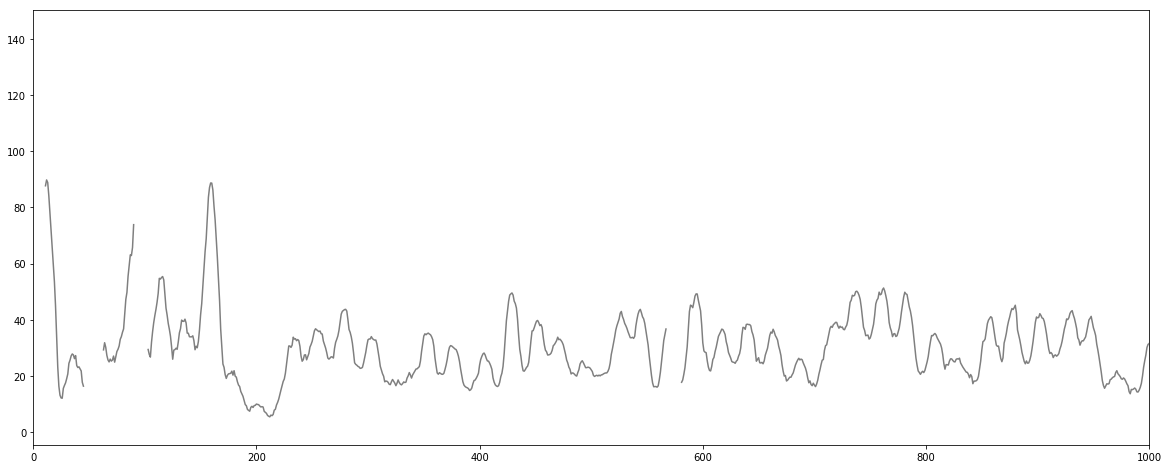

In [646]:
figsize(20,8)
pl.plot(df.X,df.PM10,'k',alpha=0.5)
#pl.plot(curve, color='red', alpha=0.5)
pl.xlim(0,1000)

In [661]:
dfCO2013=df[(df.date<'2014-10-31')&(df.date>='2013-10-31')]

In [662]:
dfCO2014=df[(df.date<'2015-10-31')&(df.date>='2014-10-31')]

In [663]:
dfCO2015=df[(df.date<'2016-10-31')&(df.date>='2015-10-31')]

In [664]:
dfCO2016=df[(df.date<'2017-10-31')&(df.date>='2016-10-31')]

In [666]:
dfCO1=np.array(dfCO2014['PM2.5'])-np.array(dfCO2013['PM2.5'])
dfCO2=np.array(dfCO2015['PM2.5'])-np.array(dfCO2014['PM2.5'])
dfCO3=np.array(dfCO2016['PM2.5'])-np.array(dfCO2015['PM2.5'])

In [651]:
dfCO1=np.array(dfCO2014.PM10)-np.array(dfCO2013.PM10)
dfCO2=np.array(dfCO2015.PM10)-np.array(dfCO2014.PM10)
dfCO3=np.array(dfCO2016.PM10)-np.array(dfCO2015.PM10)

In [635]:
dfCO1=np.array(dfCO2014.NOx)-np.array(dfCO2013.NOx)
dfCO2=np.array(dfCO2015.NOx)-np.array(dfCO2014.NOx)
dfCO3=np.array(dfCO2016.NOx)-np.array(dfCO2015.NOx)

In [667]:
dfCO2014['statCO']=dfCO1
dfCO2015['statCO']=dfCO2
dfCO2016['statCO']=dfCO3

/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gerova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [668]:
dfstat=pd.concat([dfCO2014,dfCO2015,dfCO2016],axis=0)

(735933.0, 735994.0)

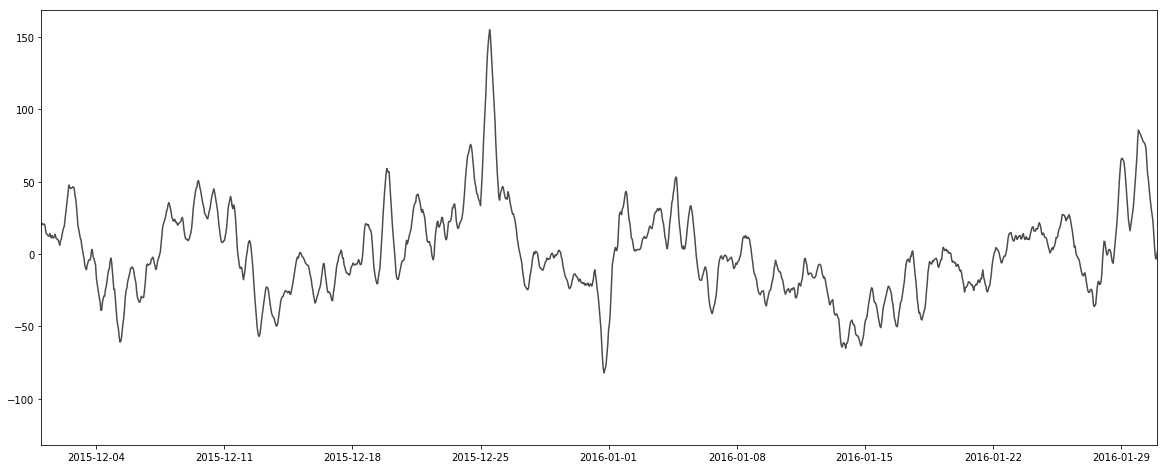

In [672]:
pl.plot(dfstat.date,dfstat.statCO,color='k',alpha=0.7)
pl.xlim('2015-12-01','2016-01-31')

In [670]:
dfstat=dfstat.reset_index()
dfstat=dfstat.drop(['index'],axis=1)

In [671]:
dfstat.to_csv('dfstatPM2.csv')

In [ ]:
fig = pl.figure(figsize = (20 ,18))
ax0,ax1,ax2,ax3 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223),fig.add_subplot(224)